### Student details

Student name: Pierre-Louis JALLERAT

Student ID: 21181659

(Erasmus Student)

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [ ]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [ ]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            # an early exit, to exit the training once convergence has been achieved.
            if len(self.errors_) > 5 and abs(self.errors_[len(self.errors_) - 1] - self.errors_[len(self.errors_) - 2]) <= 5:
              break
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [ ]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

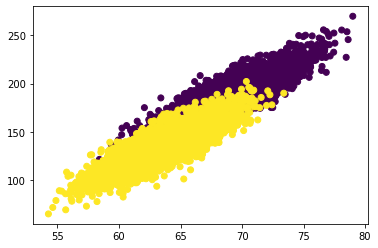

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [ ]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [ ]:
print(y_test)

[ 1 -1 -1 ...  1  1  1]


### Train the algorithm (Task)

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

ppn = Perceptron()

# Train our model with the trainig dataset and the target values
ppn.train(X_train, y_train)

[0. 0.]
[0. 0.]
result [0. 0.]
[0. 0.]
[0. 0.]
result [0. 0.]
[0. 0.]
[0. 0.]
result [0. 0.]
[0. 0.]
[0. 0.]
result [0. 0.]
[0. 0.]
[0. 0.]
result [0. 0.]
[0. 0.]
[0. 0.]
result [0. 0.]


### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [ ]:
from sklearn.metrics import accuracy_score

# Generating prediction baed on the test dataset
y_pred = ppn.predict(X_test)

#Now, we are going to compare our predicter gender labels with the knonw dataset of gender label
accuracy = accuracy_score(y_test, y_pred) 
print("The accuracy of our model is ", accuracy)

The accuracy of our model is  0.8642424242424243


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


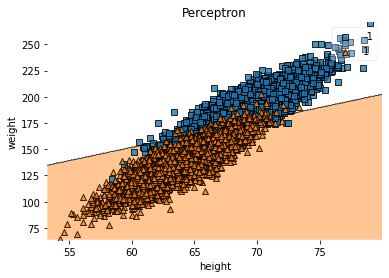

In [ ]:
# Plotting our prediction.
plot_decision_regions(X_train, y_train, clf=ppn)
plt.title('Perceptron')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

The line which splits the area into a white and orange area represents the prediction generated by the Perceptron algorithm. If the item is over the line, the algorithm predicts that the person will be a male and if the item is under the line, it predicts the person is a female.

### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

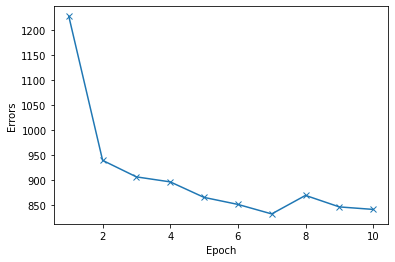

In [ ]:
# Plotting the errors by epoch
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='x')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [ ]:
#Generate 5000 random inputs
import random

X_random = []

for x in range(5000):
  random.seed(x)
  X_random.append([55 + random.random() * 23, 60 + random.random() * 195])

# Overview of the random values
print(X_random)

[[74.4217025850761, 207.801108573359], [58.09037761458523, 225.24957870276037], [76.98878825345274, 244.82635997657312], [60.4731864231135, 166.1246989327106], [60.429106063960994, 80.11737667498957], [69.32673898246314, 204.64846290584222], [73.24682192651825, 220.28103825234672], [62.448153591162736, 89.41558891527788], [60.214234765764125, 247.64753198770464], [65.6491692297455, 132.7958266220332], [68.14225967786801, 143.63336566164736], [65.40472973072583, 169.1556152856967], [65.91512560983661, 188.20713801816478], [60.95719530945589, 193.6253086280847], [57.45705636713808, 197.00417717743682], [77.20056925569882, 62.27266528946752], [63.31502382302373, 153.69372979225233], [67.00562992338735, 217.3047015381424], [59.16909185666409, 188.97895695657266], [70.57389401640621, 213.0577144369866], [75.82971255201397, 193.819560620207], [58.79383803616355, 194.50455022242562], [77.03881573579727, 87.37187506489698], [76.27190078739675, 244.97812670866955], [71.38388872001913, 223.76094

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


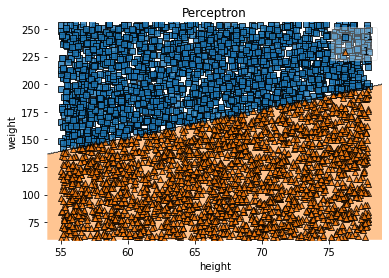

In [ ]:
# Generating prediction baed on the random values dataset
y_random = ppn.predict(X_random)

# Plotting our prediction
plot_decision_regions(np.array(X_random), y_random, clf=ppn)
plt.title('Perceptron')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

We can clearly see a decision boundary which split the blue dots (male) and the orange dots (female)

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


1. Describe what is happening as the training progresses?

For each set of height and weight, the algorithm does a dot product of the weight vector and the feature vector (height and weight vector). If the result is positive, it generates a prediction of 1 else it generates a prediction of -1. The target values are -1 (for male) or 1 (female). If the prediction is different to the target value, the weight vector is updated according to the error between the prediction and the target value.
As a result, for each set of height and weight, the algorithm improves its weight vector.

2. Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?

No, we don't arrive at the very best solution, we can see that the epoch n°34 has a lower error. This is because, the algorithm converges to its best weight vector. But it can't manage to have 0 errors and, in the same time, it also can't be more accurate so it randomly fluctuates around its best configuration. As a result the error also randomly fluctuates around the lowest error the algorithm can have.

3.	Why can’t we get zero error with this data?

We can't arrive at the very best solution because the perceptron learning rule converges if the two classes can be separated by linear hyperplane. Unfortunatly, in this exercice the male and female can not be perfectly separeted by a linear classifier for item with a height between 60 and 70 and a weigth between 150 and 175. Therefore, the algorithm will always have certain number of errors due to the items in this range because it is impossible to predict the class with assurance